In [1]:
#%matplotlib notebook
%matplotlib inline

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

from neutral_surfaces import pot_dens_surf, delta_surf
#from neutral_surfaces._densjmd95 import rho_ufunc

In [2]:
OCCA_dir = "~/work/data/OCCA/"
xrs = xr.open_dataset(OCCA_dir + "DDsalt.0406annclim.nc")
xrt = xr.open_dataset(OCCA_dir + "DDtheta.0406annclim.nc")
lon = xrs.Longitude_t.values
lat = xrs.Latitude_t.values
S = np.require(xrs.salt.values[0] , dtype=np.float64, requirements="C")  # pick first time
T = np.require(xrt.theta.values[0], dtype=np.float64, requirements="C")  # pick first time
Z = np.require(xrs.Depth_c, dtype=np.float64, requirements="C")     # DEV: currently ignoring distinction between Z and P, until Boussinesq equation of state is ready. 
S = np.moveaxis(S, 0, -1) # Move vertical axis to end
T = np.moveaxis(T, 0, -1) # Move vertical axis to end

# Select pinning cast
i0 = int(len(lon) / 2)
j0 = int(len(lat) / 2)
z0 = 1500.

In [3]:
# Here we discard the unneeded time axis.
%time s, t, z_sigma = pot_dens_surf(S, T, Z, 0., (j0, i0, z0), axis=-1, tol=1e-4)

CPU times: user 1.91 s, sys: 20.1 ms, total: 1.93 s
Wall time: 1.93 s


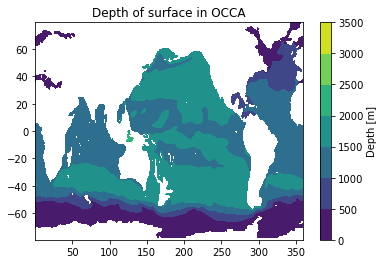

In [4]:
fig, ax = plt.subplots()
cs = ax.contourf(lon, lat, z_sigma)
cbar = fig.colorbar(cs, ax=ax)
cbar.set_label("Depth [m]")
ax.set_title(r"Depth of surface in OCCA");

In [5]:
%time s, t, z_delta = delta_surf(S, T, Z, (), (), (j0, i0, z0), axis=-1, tol=1e-4)

CPU times: user 1.63 s, sys: 28.1 ms, total: 1.66 s
Wall time: 1.66 s


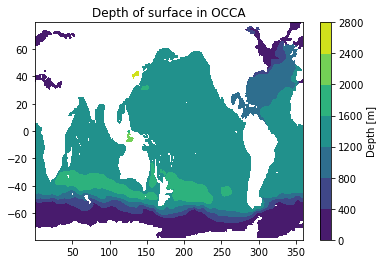

In [6]:
fig, ax = plt.subplots()
cs = ax.contourf(lon, lat, z_delta)
cbar = fig.colorbar(cs, ax=ax)
cbar.set_label("Depth [m]")
ax.set_title(r"Depth of surface in OCCA");

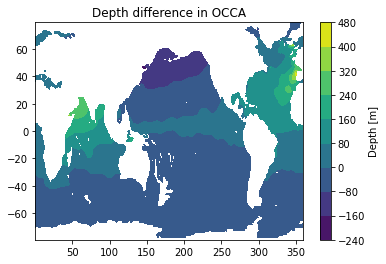

In [7]:
fig, ax = plt.subplots()
cs = ax.contourf(lon, lat, z_delta - z_sigma)
cbar = fig.colorbar(cs, ax=ax)
cbar.set_label("Depth [m]")
ax.set_title(r"Depth difference in OCCA");